In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 5
import numpy as np
np.random.seed(0)
from pyhacores.utils import *
from pyha import *
import scipy
from scipy import signal

import warnings
warnings.filterwarnings('ignore') # because they include system path -> fails unit tests on different computer

simulations = ['MODEL', 'PYHA']

# Application

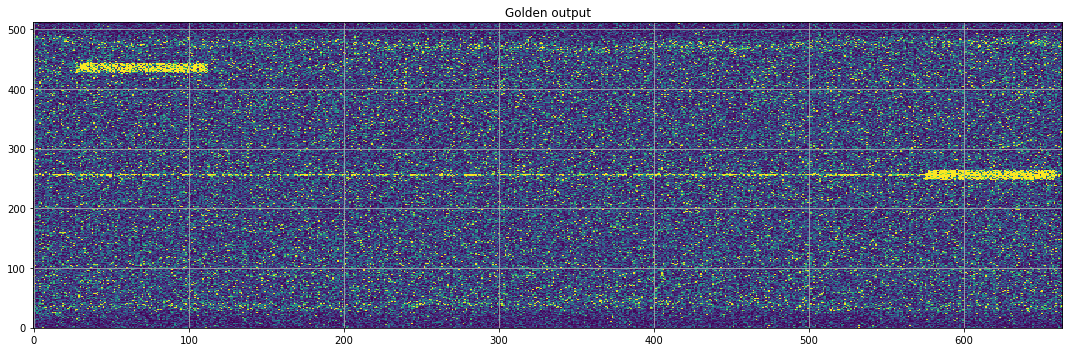

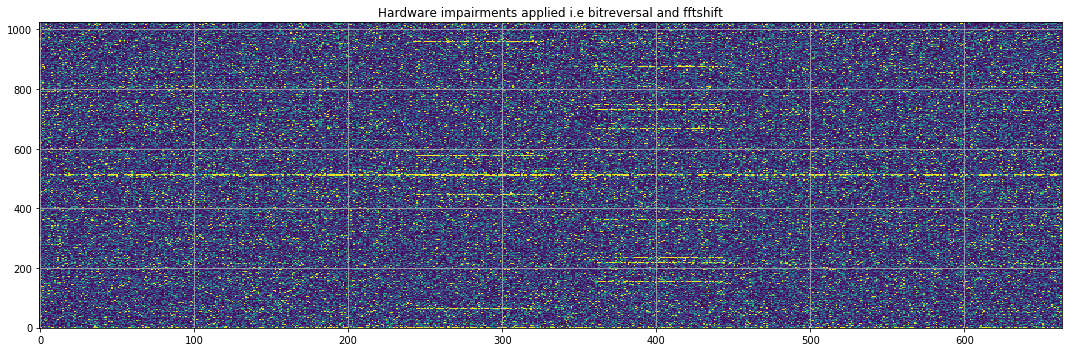

In [64]:
from pyhacores.utils import *
from scipy import signal
fft_size = 1024
avg_freq_axis = 2
file = '/home/gaspar/git/pyhacores/data/low_power_ph3.raw'
orig_inp = load_iq(file)[2120000:2800000]
orig_inp -= np.mean(orig_inp)
# orig_inp = orig_inp[:len(orig_inp)//8]

_, _, spectro_out = signal.spectrogram(orig_inp, 1, nperseg=fft_size, return_onesided=False, detrend=False,
                               noverlap=0, window='hann')

# fftshift
spectro_out = np.roll(spectro_out, fft_size//2, axis=0)

# avg decimation
x = np.split(spectro_out, len(spectro_out) // avg_freq_axis)
golden_output = np.average(x, axis=1)

plt.title('Golden output')
imshow(golden_output)

plt.title('Hardware impairments applied i.e bitreversal and fftshift')
from pyhacores.fft.util import toggle_bit_reverse

input_signal = toggle_bit_reverse(spectro_out.T).T
input_signal = np.fft.fftshift(input_signal)
imshow(input_signal)

## Fix bitreversal and fftshift

In [65]:
from pyhacores.fft import BitreversalFFTshiftAVGPool
from pyhacores.fft.packager import DataWithIndex, unpackage, package
dut = BitreversalFFTshiftAVGPool(fft_size, avg_freq_axis=2, avg_time_axis=1)
fft_sims = simulate(dut, input_signal.T, output_callback=unpackage, input_callback=package, simulations=simulations)

INFO:sim:Converting model to hardware types ...
INFO:sim:Enabled fast simulation (model cannot be converted to VHDL)
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...




  0%|          | 0/680961 [00:00<?, ?it/s]

  0%|          | 2480/680961 [00:00<00:27, 24682.91it/s]

  1%|          | 5194/680961 [00:00<00:26, 25894.77it/s]

  1%|          | 7843/680961 [00:00<00:25, 26081.80it/s]

  2%|▏         | 10521/680961 [00:00<00:25, 26254.36it/s]

  2%|▏         | 13211/680961 [00:00<00:25, 26385.24it/s]

  2%|▏         | 15849/680961 [00:00<00:25, 26387.13it/s]

  3%|▎         | 18617/680961 [00:00<00:24, 26570.65it/s]

  3%|▎         | 21322/680961 [00:00<00:24, 26629.82it/s]

  4%|▎         | 23994/680961 [00:00<00:24, 26641.83it/s]

  4%|▍         | 26657/680961 [00:01<00:24, 26638.11it/s]

  4%|▍         | 29273/680961 [00:01<00:24, 26594.01it/s]

  5%|▍         | 31921/680961 [00:01<00:24, 26586.20it/s]

  5%|▌         | 34677/680961 [00:01<00:24, 26660.63it/s]

  5%|▌         | 37338/680961 [00:01<00:24, 26639.93it/s]

  6%|▌         | 40083/680961 [00:01<00:24, 26694.32it/s]

  6%|▋         | 42765/680961 [00:01<00:23, 26652.11it/s]

  7%|▋       

 49%|████▉     | 334688/680961 [00:12<00:13, 25952.74it/s]

 50%|████▉     | 337359/680961 [00:12<00:13, 25958.52it/s]

 50%|████▉     | 340025/680961 [00:13<00:13, 25953.09it/s]

 50%|█████     | 342709/680961 [00:13<00:13, 25959.82it/s]

 51%|█████     | 345438/680961 [00:13<00:12, 25969.86it/s]

 51%|█████     | 348237/680961 [00:13<00:12, 25984.94it/s]

 52%|█████▏    | 350945/680961 [00:13<00:12, 25985.48it/s]

 52%|█████▏    | 353623/680961 [00:13<00:12, 25987.67it/s]

 52%|█████▏    | 356287/680961 [00:13<00:12, 25989.86it/s]

 53%|█████▎    | 358940/680961 [00:13<00:12, 25986.87it/s]

 53%|█████▎    | 361636/680961 [00:13<00:12, 25993.57it/s]

 54%|█████▎    | 364366/680961 [00:14<00:12, 26003.21it/s]

 54%|█████▍    | 367066/680961 [00:14<00:12, 26010.13it/s]

 54%|█████▍    | 369832/680961 [00:14<00:11, 26021.74it/s]

 55%|█████▍    | 372538/680961 [00:14<00:11, 26027.32it/s]

 55%|█████▌    | 375237/680961 [00:14<00:11, 26029.75it/s]

 56%|█████▌    | 377998/680961 [00:14<00

 99%|█████████▊| 671328/680961 [00:25<00:00, 26377.19it/s]

 99%|█████████▉| 674035/680961 [00:25<00:00, 26379.87it/s]

 99%|█████████▉| 676751/680961 [00:25<00:00, 26382.81it/s]

100%|█████████▉| 679431/680961 [00:25<00:00, 26383.03it/s]

100%|██████████| 680961/680961 [00:25<00:00, 26386.30it/s]

INFO:sim:OK!
INFO:sim:Simulations completed!


In [ ]:
snr(fft_sims['MODEL'], fft_sims['PYHA'])

## FFT to spectrum
Have to keep in mind that the output is in bit reversed ordering...
Also take a look at the 'Spectrogram' core that performs this in FPGA.

In [ ]:
plt.title('Frequency domain')
gain_fix = len(input_signal)
for key, value in fft_sims.items():
    spectrum = 20 * np.log10(np.mean(np.abs(np.array(value)), axis=0))
    spectrum = toggle_bit_reverse(spectrum, fft_size) # fix bit-reversed ordering
    spectrum = np.fft.fftshift(spectrum)
    plt.plot(np.linspace(-1, 1, fft_size), spectrum)

plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency')
show_plot()

## Inverse FFT
We are using the inputs from previous stage, that is in 'bitreversed' ordering. Thats why we have to run the IFFT with 'input_ordering = bitreversed'.

In [ ]:
ifft_256 = R2SDF(fft_size, twiddle_bits=18, inverse=True, input_ordering='bitreversed')
sims = simulate(ifft_256, fft_sims['PYHA'], output_callback=unpackage, input_callback=package, simulations=simulations)


In [ ]:
snr(np.array(sims['MODEL']), sims['PYHA'])

In [ ]:
snr(input_signal, np.array(sims['PYHA']).flatten())

In [ ]:
plt.title('Output - real part')
# for key, value in sims.items():
plt.plot(np.array(sims['MODEL']).flatten())
plt.plot(np.array(sims['PYHA']).flatten())
plt.plot(input_signal)

plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency')
# plt.ylim([-120, 1])
show_plot()

# Limitations

## Fixed-point
Expects standard FPGA Fixed point format i.e 18 bits (incl. sign) and scaled to -1...1 range.

In [ ]:
print(f'Minimum number representabe: {2**-17}')

## Coefficients are stored as constants in LUTs
Storing 18bit coefficnets for large FFT can take huge amounts of LUTS. I recommend using bitwidth of ~8, this gives quite optimal packing. Note that ~8 bit coefficents might look bad on synthetic signals but are acutally very much usable on real-life signals.

## Output ordering is different from numpy
Numpy has `Natural(in) -> Natural(out)` ordering. These cores provide either `Natural -> Bitreversed` or `Bitreversed -> Natural` ordering.

## Scaling is different from numpy
Numpy scales `fft_out *= FFT_LENGHT` and `ifft_out /= FFT_LENGHT`. 

This core works in oppsite i.e. `fft_out /= FFT_LENGHT` and `ifft_out *= FFT_LENGHT`.

# Synthesis

## FFT 256

In [ ]:
# NBVAL_IGNORE_OUTPUT
c = convertToVHDL(fft_256, '/tmp/pyha_output')
_ = c.make_quartus_netlist()

In [ ]:
print(f'Logic elements: {c.last_logic_elements}')
print(f'Memory: {c.last_memory_bits}')
print(f'Multipler (18bit): {c.last_multiplier//2}')

## IFFT 256

In [ ]:
# NBVAL_IGNORE_OUTPUT
c = convertToVHDL(ifft_256, '/tmp/pyha_output')
_ = c.make_quartus_netlist()

In [ ]:
print(f'Logic elements: {c.last_logic_elements}')
print(f'Memory: {c.last_memory_bits}')
print(f'Multipler (18bit): {c.last_multiplier//2}')